In [0]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [59]:
train_idx = ((np.argmax(mnist.train.labels, 1) == 1) | \
             (np.argmax(mnist.train.labels, 1) == 5) | \
             (np.argmax(mnist.train.labels, 1) == 6))
test_idx = ((np.argmax(mnist.test.labels, 1) == 1) | \
            (np.argmax(mnist.test.labels, 1) == 5) | \
            (np.argmax(mnist.test.labels, 1) == 6))

train_imgs   = mnist.train.images[train_idx]
train_labels = mnist.train.labels[train_idx]
test_imgs    = mnist.test.images[test_idx]
test_labels  = mnist.test.labels[test_idx]
n_train      = train_imgs.shape[0]
n_test       = test_imgs.shape[0]

print ("The number of training images : {}, shape : {}".format(n_train, train_imgs.shape))
print ("The number of testing images : {}, shape : {}".format(n_test, test_imgs.shape))
print(test_labels)

The number of training images : 16583, shape : (16583, 784)
The number of testing images : 2985, shape : (2985, 784)
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [0]:
x=tf.placeholder(tf.float32,[None,28,28,1])

In [18]:

conv1=tf.layers.conv2d(inputs=x,filters=32,kernel_size=[3,3],padding='SAME',kernel_initializer=tf.initializers.glorot_normal,activation=tf.nn.relu)
maxp1=tf.layers.max_pooling2d(inputs=conv1,pool_size=[2,2],strides=(2,2),padding='VALID')

conv2=tf.layers.conv2d(inputs=maxp1,filters=64,kernel_size=[3,3],padding='SAME',kernel_initializer=tf.initializers.glorot_normal,activation=tf.nn.relu)
maxp2=tf.layers.max_pooling2d(inputs=conv2,pool_size=[2,2],strides=(2,2),padding='VALID')
print(maxp2.get_shape())

encode=tf.layers.conv2d(inputs=conv2,filters=2,kernel_size=[7,7],padding='VALID',strides=(8,8),kernel_initializer=tf.initializers.glorot_normal,activation=tf.nn.relu)
print(encode.get_shape())



(?, 7, 7, 64)
(?, 1, 1, 2)


In [19]:

dconv3=tf.layers.conv2d_transpose(inputs=encode,filters=64,kernel_size=[7,7],padding='VALID',strides=(1,1),kernel_initializer=tf.initializers.glorot_normal,activation=tf.nn.relu)
print(dconv3.get_shape())
dconv2=tf.layers.conv2d_transpose(inputs=dconv3,filters=32,kernel_size=[3,3],padding='SAME',strides=(2,2),kernel_initializer=tf.initializers.glorot_normal,activation=tf.nn.relu)
print(dconv2.get_shape())
decode=tf.layers.conv2d_transpose(inputs=dconv2,filters=1,kernel_size=[3,3],padding='SAME',strides=(2,2),kernel_initializer=tf.initializers.glorot_normal,activation=tf.nn.relu)

(?, 7, 7, 64)
(?, 14, 14, 32)


In [0]:


loss=tf.square(x-decode)
loss=tf.reduce_mean(loss)

opt=tf.train.AdamOptimizer(0.0001).minimize(loss)

sess=tf.Session()
sess.run(tf.global_variables_initializer())


In [0]:
def get_batch(image,label,batch_size=32):
  idx=np.random.choice(image.shape[0],batch_size)
  return image[idx],label[idx]

In [86]:
record=[]
for i in range(5000):
  train_x,_=get_batch(train_imgs.reshape(-1,28,28,1),train_labels)
  _,l=sess.run([opt,loss],feed_dict={x:train_x})
  if i%100==0:
    print(l)
    record.append(l)

0.042403493
0.037144132
0.045076195
0.03763309
0.04408385
0.039999686
0.04131977
0.045393165
0.03517432
0.03451492
0.041299567
0.043293677
0.04743797
0.04080372
0.03910592
0.03533371
0.035137594
0.044268668
0.0493086
0.044314846
0.04295459
0.040332343
0.04269524
0.036370102
0.041704636
0.04380995
0.03517265
0.033701226
0.041403234
0.038122617
0.040025204
0.038837623
0.042155858
0.039673287
0.03668205
0.033278346
0.037157737
0.04104757
0.04441919
0.030903544
0.037276875
0.042674687
0.036944624
0.043898456
0.035315037
0.04067015
0.0380198
0.040885523
0.03113393
0.03979649


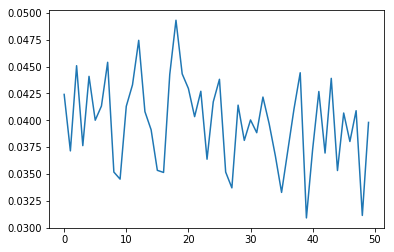

In [87]:
plt.plot(record)
plt.show()

In [115]:
test_x,_=get_batch(test_imgs,test_labels,1)
test_result=sess.run(decode,feed_dict={x:test_x.reshape(-1,28,28,1)})
print(test_result.shape)

(1, 28, 28, 1)


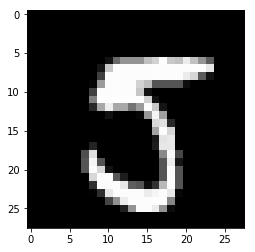

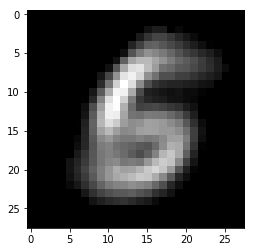

In [116]:
plt.imshow(test_x.reshape(28,28),'gray')
plt.show()
plt.imshow(test_result.reshape(28,28),'gray')
plt.show()

In [92]:
test_x,test_y=get_batch(test_imgs,test_labels,500)
cord=sess.run(encode,feed_dict={x:test_x.reshape(-1,28,28,1)})
cord=cord.reshape(-1,2)
print(cord.shape)

(500, 2)


In [93]:
idx1=np.where(test_y[:,1])[0]
idx5=np.where(test_y[:,5])[0]
idx6=np.where(test_y[:,6])[0]

print(idx6)

[  0   4   7   8  10  12  13  15  17  22  26  30  33  34  35  36  39  44
  46  48  49  51  53  55  62  66  67  68  72  74  75  76  77  78  86  87
  98  99 106 107 110 114 116 128 132 143 153 155 161 164 165 166 167 171
 172 174 175 176 177 178 179 180 183 185 187 188 189 190 200 201 202 205
 206 208 209 215 219 220 221 223 224 225 232 234 235 238 244 245 246 249
 251 252 257 259 263 267 268 272 275 276 277 278 279 286 289 290 292 298
 299 301 306 308 309 310 313 314 317 321 325 328 329 330 331 332 333 345
 349 351 352 354 356 359 361 363 366 369 370 375 382 385 392 395 397 399
 403 416 417 419 422 423 424 426 432 436 437 439 443 444 445 447 448 449
 452 454 455 459 462 463 473 478 479 490 497 499]


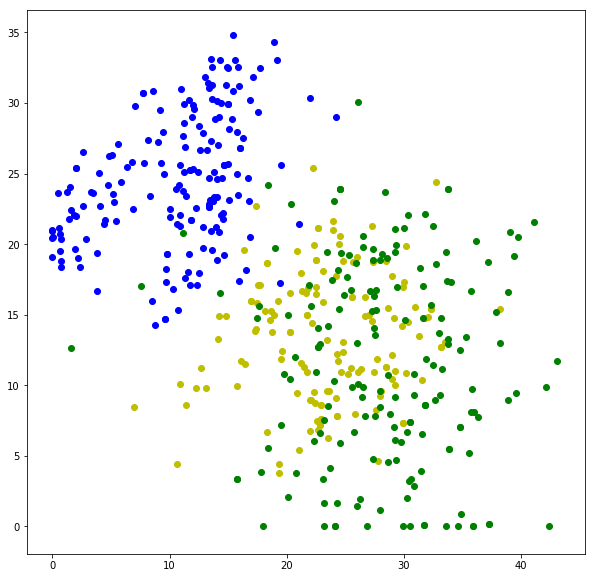

In [94]:
plt.figure(figsize=(10,10))

plt.scatter(cord[idx1,0],cord[idx1,1],color='b')
plt.scatter(cord[idx5,0],cord[idx5,1],color='y')
plt.scatter(cord[idx6,0],cord[idx6,1],color='g')
plt.plot()
plt.show()

In [0]:
reconst=sess.run(decode,feed_dict={encode:np.reshape([15,10],(-1,1,1,2))})

In [125]:
print(reconst.shape)

(1, 28, 28, 1)


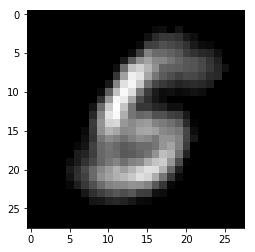

In [126]:
plt.imshow(reconst.reshape(28,28),'gray')